### 분류
- 분류 -> 명시적인 답이 있는, 레이블이 있는 머신러닝 학습 방식으로 지도학습의 대표적인 것
- 이진분류, 다중분류 등 여러가지 분류가 진행된다.
- 가장 기본적인 의사결정 나무 원리를 정확히 이해하자.
- 분류 알고리즘 -> 앙상블
- 앙상블 : 서로 같거나 다른 알고리즘을 결합하는 형태
- 배깅 / 부스팅 방식으로 나뉜다.

### 결정트리
- 가지치기 형태로 나무 형태기 때문에 "의사결정 나무"
- 분류하기 위해서 나무 형태로 나누게 된다.
- 너무나 쉽고 이해하기 좋다.
- 스케일링, 정규화 영향이 적다.


- 단점 -> 트리가 깊을수록 과적합이 될 확률이 높음
- 잘 사용하지는 않는다. 단순한 분할로 인해서 예측 정확도도 높지 않고
- 간단한 시각화 정도로 해당 데이터에 대한 인사이트는 볼 수 있다.


- 분할 -> if/else 나누는 개념
- 시작점인 뿌리(root node)에서 -> 규칙 노드들과 마지막 리프 노드(leaf node)
- 과적합 문제이기 때문에 가능한 가장 적은 분할 결정 노드로 예측 정확도를 높여야 하는데...
- 가지치기, 즉 분류에 대한 규칙이 필요하다.
- 어떤 식으로 데이터를 나눠서 분류할 것인가?

### 데이터를 어떤 식으로 분리해야 하는가?
- 분리에 대해 어떤 기준?
- 동질성과 이질성
- 데이터가 균일한 것들로 나눠지는 것

### 균일한 것이 무엇인가?
- ex) 주머니 3개가 있다.
- A 주머니 : 빨간공 3 / 노란공 2
- B 주머니 : 빨간공 4 / 노란공 1
- C 주머니 : 빨간공 5 / 노란공 0
- 어떤 게 균일한 것일까?
- 가장 균일한 것은 C 주머니다.
- 주머니 안에 들어간 "내용물"이 동일하다.
---
- 결국에는 데이터를 나눈다는 것이 균일도가 높은 데이터 세트를 먼저 선택해서 점점 나눠지는 것이다.
- 정보의 균일도 : 데이터 세트로 쪼개지면서 가지치면서 또 균일도에 따라 서브 데이터를 만들고 내려가면서 가지치기 형태로 반복을 하는 것이 DT
---
- 정보의 균일도 측정하는 기준?
- 엔트로피 지수
- 지니 지수
- 정보 이득을 위해서 측정을 하는 것 IG (Information Gain) : 정보를 얼마나 얻을 수 있는가?
- 결국 정보 이득에 대해서 엔트로피와 지니 지수 중 어떤 것으로 선택하는 것!

### 엔트로피 지수는 무엇인가?
- 정보 이득의 개념
- 데이터의 혼잡도를 나타낸다.
- 서로 다른 값이 섞여있으면 엔트로피 값이 높고, 같은 값이 섞여 있으면 엔트로피 값이 낮다.
- 무질서, 혼잡도
- 무질서한 정도를 나타내는 지표
- 사전 엔트로피 - 사후 엔트로피 (불확실성이 얼마나 줄어들었는가?)
- 이 값이 크면 불확실성이 많이 감소했다.
- IGR (Information Gain Ratio)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def entropy(x):
    return (-x * np.log2(x)).sum()

- entropy 예시
- 출석률을 생각해 보자
- 데이터분석 중급반 (상) 10번 출석
- 1 출석
- 2 출석
- 3 출석
- 4 출석
- 5 출석
- 6 출석
- 7 불참
- 8 불참
- 9 불참
- 10 출석

- 엔트로피를 계산해 보자!
- 엔트로피 계산을 위해서는 1차적으로 (출석, 불참) 발생한 비율을 계산해야 한다.
- 출석 p(7/10) + 불참 p(3/10)

In [3]:
print(0.7, "출석")
print(0.3, "불참")

0.7 출석
0.3 불참


In [4]:
df_t = entropy(0.7)
df_f = entropy(0.3)
print(df_t, df_f)

0.3602012209808308 0.5210896782498619


In [5]:
df_t + df_f

0.8812908992306927

In [6]:
print(0.9, "출석")
print(0.1, "불참")

0.9 출석
0.1 불참


In [7]:
df_t = entropy(0.9)
df_f = entropy(0.1)
print(df_t, df_f)

0.13680278410054494 0.33219280948873625


In [8]:
df_t + df_f

0.4689955935892812

In [9]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

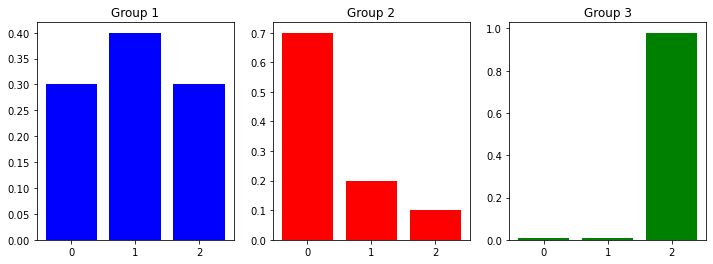

In [10]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color="blue")
axes[0].set_title("Group 1")
axes[1].bar(np.arange(3), group_2, color="red")
axes[1].set_title("Group 2")
axes[2].bar(np.arange(3), group_3, color="green")
axes[2].set_title("Group 3")
plt.show()

In [11]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f"Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup_3: {entropy_3:.3f}")

Group 1: 1.571
Group 2: 1.157
Group_3: 0.161


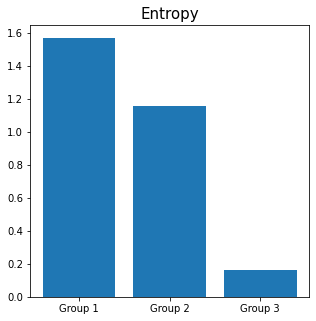

In [12]:
plt.figure(figsize=(5, 5))
plt.bar(["Group 1", "Group 2", "Group 3"], [entropy_1, entropy_2, entropy_3])
plt.title("Entropy", fontsize=15)
plt.show()

### 지니 계수
- 불평등 지수
- 0이 가장 평등, 1로 갈수록 불평등
- 지니 계수가 낮을수록 균일도가 높다는 것으로 해석, 지니 계수가 낮은 속성으로 기준 분할
- 코라도 지니가 만든 지니 계수
- 소득 분배 완전히 평등하면 기울기가 1인 대각선이 된다.
- 지니 계수가 궁금하신 분은 키워드 검색하시면 됩니다. 

In [13]:
def gini(x):
    return 1 - ((x/x.sum())**2).sum()

- 지니 계수 예시로 만들어 보기

In [14]:
df_gn = pd.DataFrame({"중급반":[0,1,2,3,4], "기초반":[10,9,8,7,6]})

In [15]:
df_gn

,중급반,기초반
0,0,10
1,1,9
2,2,8
3,3,7
4,4,6


- 0~4 인덱스 전체는 10
- 지니 계수 계산해 보자!
- 조건부확률로 접근한다.
- index 0 : 1 - ((0/10) ** 2 + (10/10) ** 2) = 0
- index 1 : 1 - ((1/10) ** 2 + (9/10) ** 2) = 0.18
- index 2 : 1 - ((2/10) ** 2 + (8/10) ** 2) = 0.32
- index 3 : 1 - ((3/10) ** 2 + (7/10) ** 2) = 0.42
- index 4 : 1 - ((4/10) ** 2 + (6/10) ** 2) = 0.48

In [16]:
1 - ((1/10) ** 2 + (9/10) ** 2)

0.17999999999999994

In [17]:
1 - ((2/10) ** 2 + (8/10) ** 2)

0.31999999999999984

In [18]:
1 - ((3/10) ** 2 + (7/10) ** 2)

0.42000000000000004

In [19]:
1 - ((4/10) ** 2 + (6/10) ** 2)

0.48

In [20]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

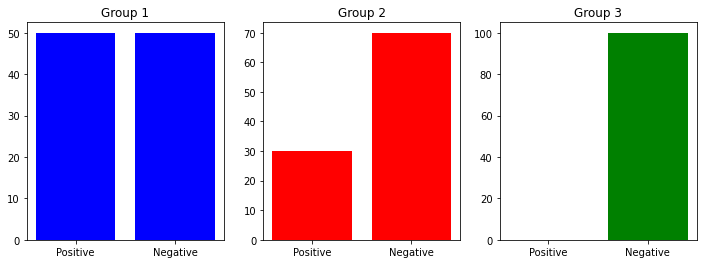

In [21]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(["Positive", "Negative"], group_1, color="blue")
axes[0].set_title("Group 1")
axes[1].bar(["Positive", "Negative"], group_2, color="red")
axes[1].set_title("Group 2")
axes[2].bar(["Positive", "Negative"], group_3, color="green")
axes[2].set_title("Group 3")
plt.show()

In [22]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f"Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}")

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


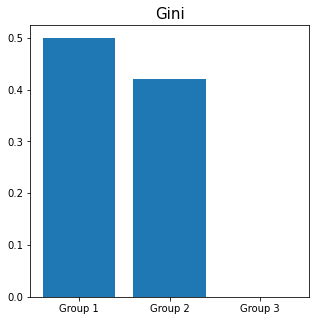

In [23]:
plt.figure(figsize=(5, 5))
plt.bar(["Group 1", "Group 2", "Group 3"], [gini_1, gini_2, gini_3])
plt.title("Gini", fontsize=15)
plt.show()

### DT 알고리즘도 여러가지 있다.
- CART (Classification and Regression Tree)
- C4.5, C5.0
- CHAID (카이제곱분석 방법으로)


- 이진분류냐 다중분류에 따라 달라지고
- 데이터가 종속형 범주형이냐에 따라 달라진다.
- 기본적으로 우리가 디폴트로 사용하는 이진분류 방식은 CART 지니 계수로 진행한다.

### 필수과제
- 지니, 엔트로피 지수 개념 정리하기
- 위의 예시 코드 외에 새로운 예시를 만들어서 직접 계산해 보기